# Chain of Responsibility

### Problem

Imagine you’re tasked with designing a system where multiple processing stages must handle incoming requests. Each stage has a specific responsibility, and *the order in which these stages are executed is **crucial***.

WE need to develop a solution that `allows an object to pass a request along a chain of handlers`. 

Upon receiving a request, each handler decides either to process the request or to pass it to the next handler in the chain.

Imagine you are building a simple program that takes input strings and tells about the various properties of the strings such as 
* is string upperCase? 
* is string lowerCase? 
* and many other properties too. 

After the complete planning, you decide that these `checks` for the input string `should be performed sequentially`. 

So, here the problem arises for the developer that he/she has to implement such `an application` that `can decide on run-time which action should be performed next`.

### Solution

**Chain of Responsibility** method is Behavioral design pattern and it is the object-oriented version of 
```python
if … elif … elif … else
``` 
and make us capable to `rearrange the condition-action blocks dynamically at the run-time`. 

It allows us to pass the requests along the chain of handlers. The processing is simple, whenever any handler received the request it has two choices either to process it or pass it to the next handler in the chain. 

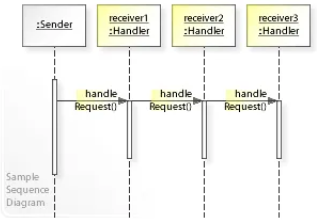


This pattern aims to decouple the senders of a request from its receivers by allowing the request to move through chained receivers until it is handled - **a loosely coupled way of executing operations sequentially**, one after the other

**Components**

* **Handler** (Abstract Class or Interface): The Handler is an abstract class or interface defining the common interface for concrete handlers. It typically includes the `handle_request` method, specifying how requests are processed. Concrete handlers must extend or implement this.
* **The Base Handler** is an optional class where you can put the boilerplate code that’s common to all handler classes.

* * Usually, this class defines a field for storing a reference to the next handler. 
* * The clients can build a chain by passing a handler to the constructor or setter of the previous handler. 
* * The class may also implement the default handling behavior: it can pass execution to the next handler after checking for its existence.
* **Concrete Handlers**: Concrete Handlers are classes extending the Handler. They represent processing stages in the chain, responsible for handling specific requests. 
* * Each concrete handler processes a request or passes it to the next. 
* * It contain the actual code for processing requests
* The **Client** may compose chains just once or compose them dynamically, depending on the application’s logic. 
* * The Client initiates requests and sends them to the first handler in the chain. 
* * Note that a request can be sent to any handler in the chain—it doesn’t have to be the first one.
* * It remains unaware of specific handlers and their responsibilities.

### UML Class Diagram

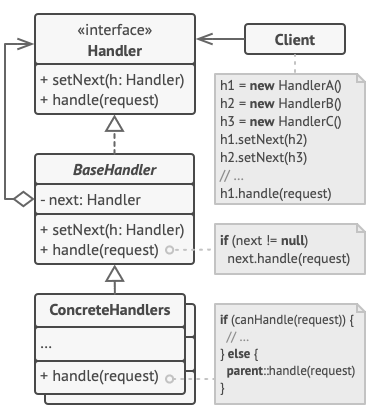

### Types of Chain of Responsibility

This pattern can manifest itself in various forms, each of which is intended for specific use cases:
* Basic Chain: In this standard form, handlers are linked sequentially, and each handler either processes the request or passes it to the next in line.
* Bidirectional Chain: Handlers can traverse the chain in both forward and backward directions, allowing for more complex decision-making scenarios.
* Hierarchical Chain: Handlers are organized into a hierarchical structure, where certain handlers have sub-handlers. Requests can be passed down the hierarchy or propagated back up if necessary.
* Dynamic Chain: The chain’s composition can change dynamically during runtime, enabling on-the-fly adjustments to handle different types of requests.

### Example 1 - an abstract implementation 

In [1]:
from abc import ABC, abstractmethod

In [211]:
# Define the Handler Interface
class IHandler(ABC):
    @abstractmethod
    def handle_request(self, request):
        pass


In [212]:
class AbstractHandler(IHandler):
    """
    The default chaining behavior can be implemented inside a base handler
    class.
    """

    _next_handler: IHandler = None

    def set_next(self, handler: IHandler) -> IHandler:
        self._next_handler = handler
        # Returning a handler from here will let us link handlers in a
        # convenient way like this:
        # handler1.set_next(handler2).set_next(handler3)
        return handler

    @abstractmethod
    def handle_request(self, request) -> str:
        if self._next_handler:
            return self._next_handler.handle_request(request)

        return None

In [213]:
#Create Concrete Handlers
class ConcreteHandlerA(AbstractHandler):
    def handle_request(self, request)-> str:
        if request == 'A':
            return f"Handled by Handler A"
        else:
            print(f"{request} - passed to the parent handler")
            return super().handle_request(request)
        
        
class ConcreteHandlerB(AbstractHandler):
    def handle_request(self, request)-> str:
        if request == 'B':
            return f"Handled by Handler B"
        else:
            print(f"{request} - passed to the parent handler")
            return super().handle_request(request)
        
class ConcreteHandlerC(AbstractHandler):
    def handle_request(self, request)-> str:
        if request == 'C':
            return f"Handled by Handler C"
        else:
            print(f"{request} - passed to the parent handler")
            return super().handle_request(request)

In [214]:
hannaRequests=[i for i in "ABCD"]
hannaRequests

['A', 'B', 'C', 'D']

In [21]:
#Create the Chain in the Client Code

def client(h: IHandler, reqs: list):
    for req in reqs:
        result=h.handle_request(req)
        if result:
            print(f"{h.__class__} processed {req}: {result}")
        else:
            print(f"{req} can't be processed")
    


In [23]:
h_a=ConcreteHandlerA()
h_b=ConcreteHandlerB()
h_c=ConcreteHandlerC()

h_a.set_next(h_b).set_next(h_c) # make the chain

print(f"Chain: {h_a.__class__} > {h_b.__class__} > {h_c.__class__}")
client(h_a, hannaRequests)

print(f"SubChain: {h_b.__class__} > {h_c.__class__}")
client(h_b, hannaRequests)


Chain: <class '__main__.ConcreteHandlerA'> > <class '__main__.ConcreteHandlerB'> > <class '__main__.ConcreteHandlerC'>
<class '__main__.ConcreteHandlerA'> processed A: Handled by Handler A
B - passed to the parent handler
<class '__main__.ConcreteHandlerA'> processed B: Handled by Handler B
C - passed to the parent handler
C - passed to the parent handler
<class '__main__.ConcreteHandlerA'> processed C: Handled by Handler C
D - passed to the parent handler
D - passed to the parent handler
D - passed to the parent handler
D can't be processed
SubChain: <class '__main__.ConcreteHandlerB'> > <class '__main__.ConcreteHandlerC'>
A - passed to the parent handler
A - passed to the parent handler
A can't be processed
<class '__main__.ConcreteHandlerB'> processed B: Handled by Handler B
C - passed to the parent handler
<class '__main__.ConcreteHandlerB'> processed C: Handled by Handler C
D - passed to the parent handler
D - passed to the parent handler
D can't be processed


### Example 2 - password validator

We are going to implement a plugin style password validator which will validate

* Min 8 Characters
* Uppercase Letters
* Contains Number

And if one validation fails, the Chain of Responsibility pattern ensures that the validation process stops, and other scenarios are not validated.

In [251]:
from abc import ABC, abstractmethod

#Handler - Interface
class IHandler(ABC):
    @abstractmethod

    def handle_request(self, request):
        pass
    

In [252]:
class Handler(IHandler):
    def __init__(self, successor=None):
        self._successor = successor
        self._success = False
        
    @property
    def successor(self):
        return self._successor
    
    @successor.setter
    def successor(self, successor):
        self._successor = successor

    def handle_request(self, request):
        if not self._success and self._successor:
            self._successor.handle_request(request)

    @abstractmethod
    def process_request(self, request):
        pass

In [253]:
class Min8CharsHandler(Handler):
    def process_request(self, request):
        if len(request) >= 8:
            self._success = True
        else:
            raise ValueError("Password must be at least 8 characters long")


class UppercaseHandler(Handler):
    def process_request(self, request):
        if any(char.isupper() for char in request):
            self._success = True
        else:
            raise ValueError("Password must contain at least one uppercase letter")


class DigitHandler(Handler):
    def process_request(self, request):
        if any(char.isdigit() for char in request):
            self._success = True
        else:
            raise ValueError("Password must contain at least one digit")

In [254]:
handlers = [Min8CharsHandler(), UppercaseHandler(), DigitHandler()]

In [255]:
class PasswordValidator:
    def __init__(self, handlers):
        self.first_handler = handlers[0]
        for i in range(len(handlers) - 1):
            handlers[i].successor=handlers[i + 1]

    def validate(self, password):
        current_handler = self.first_handler
        try:
            current_handler.process_request(password)
        except ValueError as e:
            return str(e)

        current_handler = current_handler.successor

        while current_handler:
            try:
                current_handler.process_request(password)
            except ValueError as e:
                return str(e)
            current_handler = current_handler.successor

In [256]:
password_validator = PasswordValidator(handlers)

print(password_validator.validate("hannaaaa"))  # Password validation failed
print(password_validator.validate("hanna1"))  # Password validation failed
print(password_validator.validate("Hanna"))  # Password validation failed
print(password_validator.validate("Hanna1"))  # Password validation failed
print(password_validator.validate("Hanna123"))  # ok

Password must contain at least one uppercase letter
Password must be at least 8 characters long
Password must be at least 8 characters long
Password must be at least 8 characters long
None


### Example 3 - displaying contextual help information for active GUI elements

In [215]:
from abc import ABC, abstractmethod

#Handler - Interface
class IComponent(ABC):
    @abstractmethod
    def showHelp(self):
        pass

In [216]:
#The base class for simple components.
class Component(IComponent):
    _container: IComponent = None # _next_handler
    _tooltipText: str=None
    _coords:list=[]
    
    @property
    def coords(self):
        return self._coords
    
    @coords.setter
    def coords(self, newCoords:list[int]):
        if len(newCoords)==2:
            self._coords=newCoords if self._container==None else [sum(x) for x in zip(newCoords, self._container._coords)]
    
    @abstractmethod
    def showHelp(self) -> str:
        if self._tooltipText: #The component shows a tooltip if there's help text assigned to it.
            print(self._tooltipText)
        else: #otherwise it forwards the call to the container, if it exists.
            if self._container:
                self._container.showHelp()


In [217]:
#Create Concrete Handlers - 1. Containers
#Containers can contain both Simple Components and other Containers as children. 

class Container (Component):
    def __init__(self, coords=[0,0],container: Component=None,tooltipText: str=None):
        self._container=container
        self._tooltipText=tooltipText
        self._coords=coords
        self.__children:list[Component]=[]
        
    @property
    def children(self):
        return self.__children
        
    def add(self, child: Component):
        self.__children.append(child)
        child._container=self
        #print(child.coords, self._coords)
        child.coords=child.coords #to update child's coord after adding it to a container


In [218]:
class Button (Component):
    def __init__(self,label:str="MyButton",coords=[0,0]):
        self.__label=label
        self._coords=coords 
    
    def show(self):
        print(f"I am {self.__class__} with label: {self.__label}")
        
    def showHelp(self) -> str:
        super().showHelp()

In [219]:
#Create Concrete Containers 
class Panel(Container):
    def __init__(self, coords=[0,0],modalHelpText:str=None):
        self.__modalHelpText=modalHelpText
        super().__init__(coords=coords)
    
    def showHelp(self) -> str:
        if self.__modalHelpText: #Show a modal window with the help text
            print(self.__modalHelpText)
        else: #otherwise it forwards the call to the container, if it exists.
            super().showHelp()        
    
    
class Dialog (Container):
    def __init__(self, coords=[0,0], wikiPageURL:str=None):
        self.__wikiPageURL=wikiPageURL
        super().__init__(coords=coords)
    
    def showHelp(self) -> str:
        if self.__wikiPageURL: #Open the wiki help page.
            print(self.__wikiPageURL)
        else: #otherwise it forwards the call to the container, if it exists.
            super().showHelp()  

In [220]:
#Client code.

class Application:
    def __init__(self):
        self.__appComponents=[]
        
    def addComponent(self, appComponent:Component):
        self.__appComponents.append(appComponent)
        
    def onF1KeyPress(self, coords):
        status=False
        for appComponent in self.__appComponents:
            if isinstance(appComponent,Container):
                print(appComponent)
                for item in appComponent.children:
                    print(item)
                    if item.coords==coords:
                        item.showHelp()
                        status=True
            elif appComponent.coords==coords:
                appComponent.showHelp()
                status=True
        if status==False: 
            print("I have nothing there...")
                
        

In [221]:
hannaApp=Application()

In [222]:
btn1=Button("MyBtn1",[10,10])

btn2=Button("MyBtn2")

dlg1=Dialog(wikiPageURL="wikiPageURL.dlg1.com",coords=[50,50])
dlg1.add(btn2) #dlg1>btn2
btn2.coords=[10,10]



In [223]:
print(btn1.coords)

print(dlg1.coords)
print(btn2.coords)

[10, 10]
[50, 50]
[60, 60]


In [224]:
pnl1=Panel(coords=[30,30], modalHelpText="This panel help...")
dlg2=Dialog(coords=[20,20])
print(dlg2.coords)

pnl1.add(dlg2)  #pnl1>dlg2
print(pnl1.coords)
print(dlg2.coords)


[20, 20]
[30, 30]
[50, 50]


In [225]:
btn3=Button("MyBtn3",[5,5])
print(btn3.coords)

dlg2.add(btn3) #pnl1>dlg2>btn3
print(btn3.coords)

[5, 5]
[55, 55]


In [226]:
hannaApp.addComponent(btn1)
hannaApp.addComponent(dlg1)
hannaApp.addComponent(pnl1)

In [227]:
hannaApp.onF1KeyPress([5, 5])

I have nothing there...


[5,5] - >nothing, since after adding to dlg2 btn3 has [55,55]

In [228]:
hannaApp.onF1KeyPress([10, 10]) #btn1 is here

No result - > since btn1 can't do this and it doesn't have a parent container

In [229]:
btn2.coords

[60, 60]

In [230]:
hannaApp.onF1KeyPress([60, 60]) #btn2 is in the dlg1 container

wikiPageURL.dlg1.com


In [231]:
print(btn3.coords)

[55, 55]


In [232]:
hannaApp.onF1KeyPress([55, 55]) # #pnl1>dlg2>btn3

I have nothing there...


In [238]:
def flatten(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list += flatten(item)
        else:
            flat_list.append(item)
    return flat_list 

In [239]:
flatten([1,[2,3],[4,[5,6]]])

[1, 2, 3, 4, 5, 6]